In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train (1).parquet to train (1).parquet


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.parquet to test.parquet


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving model.tar.gz to model.tar.gz


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import xgboost as xgb

In [ ]:
test_df = pd.read_parquet("test.parquet")
train_df = pd.read_parquet("train (1).parquet")

In [ ]:
X_test = test_df.drop(columns="target")
y_test = test_df["target"]

In [ ]:
X_train = train_df.drop(columns="target")

In [ ]:
X_test = X_test.loc[:, ~X_test.columns.str.startswith("custid_")]
X_train = X_train.loc[:, ~X_train.columns.str.startswith("custid_")]

In [ ]:
if "created" in X_test.columns:
    X_test["created_year"] = X_test["created"].dt.year
    X_test["created_month"] = X_test["created"].dt.month
    X_test["created_day"] = X_test["created"].dt.day
    X_test = X_test.drop(columns=["created"])

In [ ]:
if "created" in X_train.columns:
    X_train["created_year"] = X_train["created"].dt.year
    X_train["created_month"] = X_train["created"].dt.month
    X_train["created_day"] = X_train["created"].dt.day
    X_train = X_train.drop(columns=["created"])

In [ ]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test = X_test.apply(pd.to_numeric, errors="coerce")

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
X_test.fillna(0, inplace=True)

In [ ]:
import tarfile
with tarfile.open("model.tar.gz", "r:gz") as tar:
    tar.extractall("model")

In [ ]:
import os
for root, dirs, files in os.walk("."):
    for name in files:
        if name.endswith(".joblib"):
            print(os.path.join(root, name))

./model/model.joblib


In [ ]:
model = joblib.load("./model/model.joblib")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:08:33] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:08:33] WARNING: /workspace/src/learner.cc:872: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
  warnings.warn(smsg, UserWarning)


In [ ]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test = X_test.apply(pd.to_numeric, errors="coerce")

X_test = X_test.loc[:, ~X_test.columns.str.startswith("custid_")]
X_train = X_train.loc[:, ~X_train.columns.str.startswith("custid_")]

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [ ]:
X_test.fillna(0, inplace=True)

In [ ]:
print("Expected:", model.n_features_in_)
print("X_test shape:", X_test.shape)

Expected: 5102
X_test shape: (4621, 5104)


In [ ]:
diff_cols = set(X_test.columns) - set(X_train.columns)
print("Extra columns in X_test:", diff_cols)

Extra columns in X_test: set()


In [ ]:
X_test.drop(columns=diff_cols, inplace=True)

In [ ]:
X_train = pd.get_dummies(X_train)
saved_columns = X_train.columns

In [ ]:
joblib.dump(saved_columns, "./model/columns.joblib")

['./model/columns.joblib']

In [ ]:
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=saved_columns, fill_value=0)

In [ ]:
saved_columns = joblib.load("./model/columns.joblib")
X_test = X_test.reindex(columns=saved_columns, fill_value=0)

In [ ]:
model = joblib.load("./model/model.joblib")
saved_columns = joblib.load("./model/columns.joblib")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:24:55] WARNING: /workspace/src/learner.cc:872: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
  warnings.warn(smsg, UserWarning)


In [ ]:
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=saved_columns, fill_value=0)

In [ ]:
X_test = X_test[saved_columns]

In [ ]:
model = joblib.load("./model/model.joblib")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:05] WARNING: /workspace/src/learner.cc:872: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
  warnings.warn(smsg, UserWarning)


In [ ]:
X_test = X_test.loc[:, ~X_test.columns.str.startswith("custid_")]
X_test = X_test.apply(pd.to_numeric, errors="coerce")

In [ ]:
X_test = pd.get_dummies(X_test)

In [ ]:
expected_features = model.get_booster().feature_names

In [ ]:
X_test = X_test.reindex(columns=expected_features, fill_value=0)

In [ ]:
 model = joblib.load("./model/model.joblib")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:43:11] WARNING: /workspace/src/learner.cc:872: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
  warnings.warn(smsg, UserWarning)


In [ ]:
X_test = X_test.loc[:, ~X_test.columns.str.startswith("custid_")]
X_test = X_test.apply(pd.to_numeric, errors="coerce")
X_test = pd.get_dummies(X_test)
X_test.fillna(0, inplace=True)

In [ ]:
expected_n = model.get_booster().num_features()
actual_n = X_test.shape[1]

print("Expected:", expected_n)
print("Actual:", actual_n)

Expected: 5102
Actual: 5104


In [ ]:
if actual_n > expected_n:
    X_test = X_test.iloc[:, :expected_n]

In [ ]:
preds = model.predict_proba(X_test)[:, 1]

In [ ]:
auc = roc_auc_score(y_test, preds)
print(f"ROC AUC Score: {auc:.4f}")

ROC AUC Score: 0.6564


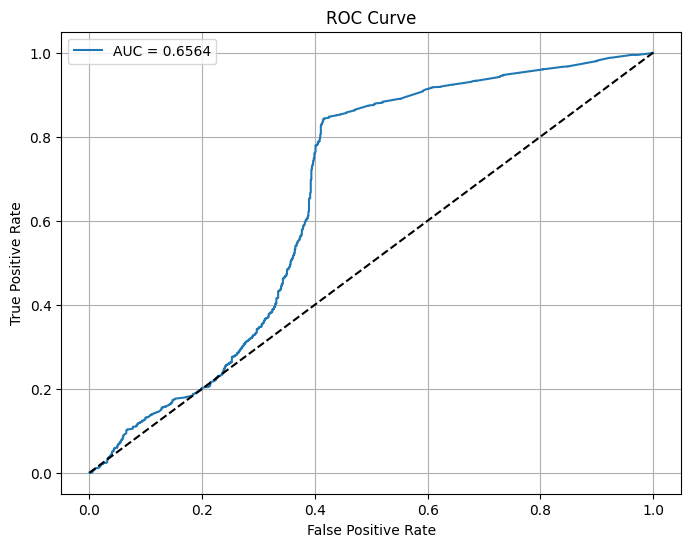

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

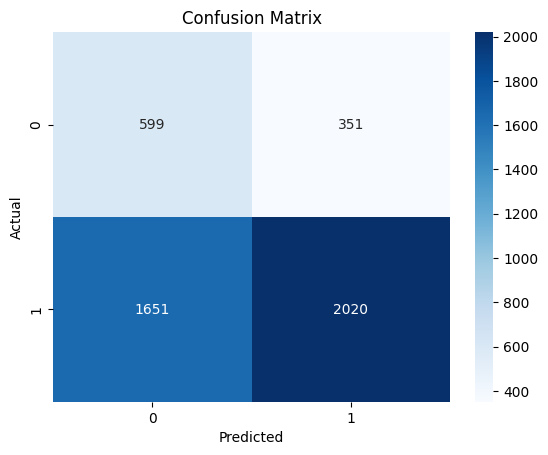

In [ ]:
from sklearn.metrics import confusion_matrix
pred_labels = (preds > 0.5).astype(int)
cm = confusion_matrix(y_test, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.63      0.37       950
           1       0.85      0.55      0.67      3671

    accuracy                           0.57      4621
   macro avg       0.56      0.59      0.52      4621
weighted avg       0.73      0.57      0.61      4621



In [ ]:
print("Model expects:", model.n_features_in_)
print("X_test shape:", X_test.shape)
print("Difference:", set(X_test.columns) ^ set(saved_columns))

Model expects: 5102
X_test shape: (4621, 5104)
Difference: set()


In [ ]:
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

In [ ]:
print(X_test.shape)

(4621, 5104)


In [ ]:
dupes = X_test.columns[X_test.columns.duplicated()].tolist()
print(f"Duplicate columns: {dupes}")

Duplicate columns: []


In [ ]:
expected_feature_count = model.n_features_in_
actual_feature_count = X_test.shape[1]
print(f"Model expects {expected_feature_count} features")
print(f"X_test has {actual_feature_count} features")

Model expects 5102 features
X_test has 5104 features


In [ ]:
expected_columns = set(X_test.columns[:expected_feature_count])
actual_columns = set(X_test.columns)
extra = actual_columns - expected_columns
missing = expected_columns - actual_columns
print(f"Extra columns in test: {extra}")
print(f"Missing columns in test: {missing}")

Extra columns in test: {'created_day', 'created_month'}
Missing columns in test: set()


In [ ]:
X_test = X_test.drop(['created_day', 'created_month'], axis=1)

In [ ]:
preds = model.predict_proba(X_test)[:, 1]

In [ ]:
roc_score = roc_auc_score(y_test, preds)
print(f"ROC AUC Score: {roc_score:.4f}")

ROC AUC Score: 0.6564


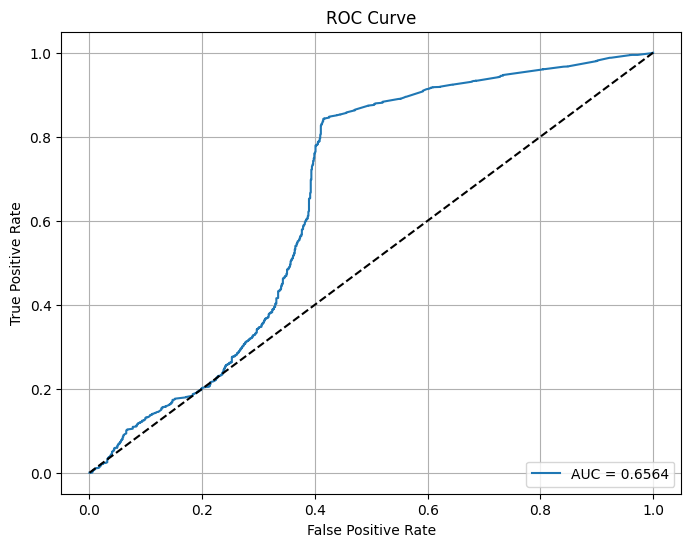

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
y_pred = (preds >= 0.5).astype(int)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 599  351]
 [1651 2020]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.63      0.37       950
           1       0.85      0.55      0.67      3671

    accuracy                           0.57      4621
   macro avg       0.56      0.59      0.52      4621
weighted avg       0.73      0.57      0.61      4621



In [ ]:
y_pred = (preds >= 0.5).astype(int)

In [ ]:
results_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred,
    "proba": preds
})

In [ ]:
retained = results_df[results_df["actual"] == 0]

In [ ]:
retained_correct = retained[retained["predicted"] == 0]

In [ ]:
retention_accuracy = len(retained_correct) / len(retained) if len(retained) > 0 else 0
print(f"30-Day Retention Accuracy: {retention_accuracy:.4f}")

30-Day Retention Accuracy: 0.6305


The evaluation metrics ROC AUC (0.6564), accuracy (57%), and a 30-day retention accuracy of 63% indicate that while it functions correctly and follows a complete end-to-end ML workflow the model would benefit from further tuning.